In [319]:
import pandas as pd

df = pd.read_csv("pm10_data.csv")

# Parse datetime
df["datum_zajema"] = pd.to_datetime(df["datum_zajema"])

# Set datetime as index
df = df.set_index("datum_zajema").sort_index()
df = df.reset_index()

df.head()
df


,datum_zajema,vrednost,mesto
0,2023-01-01 01:00:00,33.3,Solkan
1,2023-01-01 01:00:00,8.4,CE Ljubljanska
2,2023-01-01 01:00:00,11.3,Hrastnik
3,2023-01-01 01:00:00,12.4,MS Rakičan
4,2023-01-01 01:00:00,15.1,Zagorje
...,...,...,...
1021925,2024-04-23 00:00:00,2.7,Solkan
1021926,2024-04-23 00:00:00,5.0,Trbovlje
1021927,2024-04-23 00:00:00,11.5,MS Rakičan
1021928,2024-04-23 00:00:00,16.5,CE Ljubljanska


In [320]:
df['mesto'].unique()

array(['Solkan', 'CE Ljubljanska', 'Hrastnik', 'MS Rakičan', 'Zagorje',
       'Ptuj', 'Koper', 'NG Grčna', 'CE bolnica', 'Iskrba', 'LJ Bežigrad',
       'MB Titova', 'MS Cankarjeva', 'LJ Celovška', 'Trbovlje'],
      dtype=object)

In [321]:
import pandas as pd

dff = pd.read_csv("murska-sobota-podatki")

## Parse datetime
#dff["datum_zajema"] = pd.to_datetime(df["datum_zajema"])

# Set datetime as index
#dff = dff.set_index("datum_zajema").sort_index()
dff = dff.reset_index()

dff.head()
dff


,index,station id,station name,valid,povp. T [°C],količina padavin [mm],hitrost vetra [m/s]
0,0,_1842,Murska Sobota,2023-01-01 00:00,6.9,0.0,1.5
1,1,_1842,Murska Sobota,2023-01-01 00:10,8.1,NaN,1.6
2,2,_1842,Murska Sobota,2023-01-01 00:20,9.1,NaN,2.4
3,3,_1842,Murska Sobota,2023-01-01 00:30,10.2,0.0,3.0
4,4,_1842,Murska Sobota,2023-01-01 00:40,11.1,NaN,3.2
...,...,...,...,...,...,...,...
17419,17419,_1842,Murska Sobota,2023-05-01 23:10,12.3,NaN,1.0
17420,17420,_1842,Murska Sobota,2023-05-01 23:20,12.2,NaN,0.6
17421,17421,_1842,Murska Sobota,2023-05-01 23:30,12.2,0.0,0.9
17422,17422,_1842,Murska Sobota,2023-05-01 23:40,12.1,NaN,1.2


In [322]:
cities = [
    "celje",
    "hrastnik",
    "iskrba",
    "koper",
    "maribor",
    "ptuj",
    "trbovlje",
    "zagorje",
    "lj_bezigrad",
    "murska_sobota",
    "nova_gorica",
]


In [323]:
def extract_city(col):
    for city in cities:
        suffix = "_" + city
        if col.endswith(suffix):
            return city
    return None

def extract_variable(col):
    for city in cities:
        suffix = "_" + city
        if col.endswith(suffix):
            return col[:-len(suffix)]
    return None


In [324]:
import pandas as pd
from functools import reduce

files = {
    "celje": "celje-podatki",
    "hrastnik": "hrastnik-podatki",
    "iskrba": "iskrba-podatki",
    "koper": "koper-podatki",
    "maribor": "maribor-podatki",
    "ptuj": "ptuj-podatki",
    "trbovlje": "trbovlje-podatki",
    "zagorje": "zagorje-podatki",
    "lj_bezigrad": "lj_bezigrad_podatki",
    "murska_sobota": "murska-sobota-podatki",
    "nova_gorica": "nova-gorica-podatki",
}


dfs = {}


In [325]:
for city, path in files.items():
    df = pd.read_csv(path)
    df.columns = df.columns.str.strip()
    
    # Parse timestamp
    df["valid"] = pd.to_datetime(df["valid"])

    # Drop non-meteo columns
    df = df.drop(columns=["station id", "station name", "datum_zajema"], errors="ignore")

    # Rename variables with city suffix
    df = df.rename(
        columns={c: f"{c}_{city}" for c in df.columns if c != "valid"}
    )

    dfs[city] = df


In [326]:
df_merged = reduce(
    lambda left, right: pd.merge(left, right, on="valid", how="outer"),
    dfs.values()
)

df_merged = df_merged.sort_values("valid").reset_index(drop=True)


In [327]:
df_pm10

,datum_zajema,vrednost,mesto
2,2023-01-01 01:00:00,11.3,hrastnik
4,2023-01-01 01:00:00,15.1,zagorje
5,2023-01-01 01:00:00,7.1,ptuj
6,2023-01-01 01:00:00,142.8,koper
7,2023-01-01 01:00:00,88.7,nova_gorica
...,...,...,...
1021922,2024-04-23 00:00:00,5.8,hrastnik
1021923,2024-04-23 00:00:00,1.4,koper
1021924,2024-04-23 00:00:00,13.1,murska_sobota
1021926,2024-04-23 00:00:00,5.0,trbovlje


In [328]:
import pandas as pd

df_pm10 = pd.read_csv("pm10_data.csv")
df_pm10.columns = df_pm10.columns.str.strip()
# Parse datetime
df_pm10["datum_zajema"] = pd.to_datetime(df_pm10["datum_zajema"])

# Set datetime as index
df_pm10 = df_pm10.set_index("datum_zajema").sort_index()
df_pm10 = df_pm10.reset_index()

df_pm10.head()
df_pm10

,datum_zajema,vrednost,mesto
0,2023-01-01 01:00:00,33.3,Solkan
1,2023-01-01 01:00:00,8.4,CE Ljubljanska
2,2023-01-01 01:00:00,11.3,Hrastnik
3,2023-01-01 01:00:00,12.4,MS Rakičan
4,2023-01-01 01:00:00,15.1,Zagorje
...,...,...,...
1021925,2024-04-23 00:00:00,2.7,Solkan
1021926,2024-04-23 00:00:00,5.0,Trbovlje
1021927,2024-04-23 00:00:00,11.5,MS Rakičan
1021928,2024-04-23 00:00:00,16.5,CE Ljubljanska


In [329]:
wanted_vars = [
    "količina padavin [mm]",
    "hitrost vetra [m/s]",
    "povp. T [°C]"
]

cols = ["valid"] + [
    c for c in df_merged.columns
    if any(c.startswith(v) for v in wanted_vars)
]

df = df_merged[cols].copy()


In [330]:
df_long = df.melt(
    id_vars="valid",
    var_name="var_city",
    value_name="value"
)


In [331]:
df_long["mesto"] = df_long["var_city"].apply(extract_city)
df_long["variable_raw"] = df_long["var_city"].apply(extract_variable)

df_long = df_long.dropna(subset=["mesto"])


In [332]:
var_map = {
    "količina padavin [mm]": "padavine",
    "hitrost vetra [m/s]": "veter",
    "povp. T [°C]": "temperatura",
}

df_long["variable"] = df_long["variable_raw"].map(var_map)
df_long = df_long.dropna(subset=["variable"])


In [333]:
df_long = (
    df_long
    .pivot_table(
        index=["valid", "mesto"],
        columns="variable",
        values="value"
    )
    .reset_index()
)


In [334]:
df_long['mesto'].unique()

array(['celje', 'hrastnik', 'iskrba', 'koper', 'lj_bezigrad', 'maribor',
       'murska_sobota', 'nova_gorica', 'ptuj', 'trbovlje', 'zagorje'],
      dtype=object)

In [335]:
df_pm10['mesto'].unique()

array(['Solkan', 'CE Ljubljanska', 'Hrastnik', 'MS Rakičan', 'Zagorje',
       'Ptuj', 'Koper', 'NG Grčna', 'CE bolnica', 'Iskrba', 'LJ Bežigrad',
       'MB Titova', 'MS Cankarjeva', 'LJ Celovška', 'Trbovlje'],
      dtype=object)

In [336]:
# Remove unwanted stations
df_pm10 = df_pm10[~df_pm10["mesto"].isin(["Solkan", "CE Ljubljanska", "LJ Celovška"])]

# Standardize remaining city names to match df_long
df_pm10["mesto"] = df_pm10["mesto"].replace({
    "Hrastnik": "hrastnik",
    "Iskrba": "iskrba",
    "Koper": "koper",
    "LJ Bežigrad": "lj_bezigrad",
    "MB Titova": "maribor",
    "MS Cankarjeva": "murska_sobota",
    "NG Grčna": "nova_gorica",
    "Ptuj": "ptuj",
    "Trbovlje": "trbovlje",
    "Zagorje": "zagorje",
    "CE bolnica": "celje",
    "Celje": "celje"
})


C:\Users\Dell\AppData\Local\Temp\ipykernel_11392\1585698484.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pm10["mesto"] = df_pm10["mesto"].replace({


In [337]:
#TODO: do tuki sm prsla

print(df_long['mesto'].unique())


# Remove MS Rakičan from df_pm10
df_pm10 = df_pm10[df_pm10["mesto"] != "MS Rakičan"]

# (optional) sanity check
print(df_pm10["mesto"].unique())


['celje' 'hrastnik' 'iskrba' 'koper' 'lj_bezigrad' 'maribor'
 'murska_sobota' 'nova_gorica' 'ptuj' 'trbovlje' 'zagorje']
['hrastnik' 'zagorje' 'ptuj' 'koper' 'nova_gorica' 'celje' 'iskrba'
 'lj_bezigrad' 'maribor' 'murska_sobota' 'trbovlje']


In [338]:
import pandas as pd

# Rename columns to include units
df_long = df_long.rename(columns={
    "temperatura": "temperatura [°C]",
    "padavine": "padavine [mm]",
    "veter": "veter [m/s]",
    "valid": 'datum_zajema'
})

# Save to CSV
df_long.to_csv("temperatura_padavine_veter.csv", index=False)
df_long


variable,datum_zajema,mesto,padavine [mm],temperatura [°C],veter [m/s]
0,2023-01-01 00:00:00,celje,0.0,13.2,7.2
1,2023-01-01 00:00:00,hrastnik,0.0,11.6,1.9
2,2023-01-01 00:00:00,iskrba,0.0,9.7,1.7
3,2023-01-01 00:00:00,koper,0.0,11.4,0.8
4,2023-01-01 00:00:00,lj_bezigrad,0.0,12.4,2.1
...,...,...,...,...,...
168427,2023-05-01 23:50:00,murska_sobota,NaN,12.1,1.4
168428,2023-05-01 23:50:00,nova_gorica,NaN,13.1,0.6
168429,2023-05-01 23:50:00,ptuj,NaN,12.4,0.5
168430,2023-05-01 23:50:00,trbovlje,NaN,12.8,1.1


here another solution starts


In [339]:
# Make sure both keys exist and are clean
df_pm10["datum_zajema"] = pd.to_datetime(df_pm10["datum_zajema"])
df_long["datum_zajema"] = pd.to_datetime(df_long["datum_zajema"])

df_pm10["mesto"] = df_pm10["mesto"].str.strip().str.lower()
df_long["mesto"] = df_long["mesto"].str.strip().str.lower()

# Correct merge: time + city
df_merged = pd.merge(
    df_pm10,
    df_long,
    on=["datum_zajema", "mesto"],
    how="inner"
)

# Sort & reset index
df_merged = df_merged.sort_values(["mesto", "datum_zajema"]).reset_index(drop=True)


df_merged = df_merged.rename(columns={
    "vrednost": "pm10 [µg/m³]"
})



In [340]:
df_merged = df_merged[
    ["datum_zajema", "mesto"] +
    [c for c in df_merged.columns if c not in ["datum_zajema", "mesto"]]
]




In [341]:
df_merged.head()


,datum_zajema,mesto,pm10 [µg/m³],padavine [mm],temperatura [°C],veter [m/s]
0,2023-01-01 01:00:00,celje,6.1,0.0,13.2,6.3
1,2023-01-01 01:30:00,celje,6.2,0.0,13.4,7.5
2,2023-01-01 02:00:00,celje,5.8,0.0,13.5,7.8
3,2023-01-01 02:30:00,celje,4.6,0.0,12.8,4.5
4,2023-01-01 03:00:00,celje,6.0,0.0,11.9,3.2


In [342]:
df_merged.to_csv("temperatura_padavine_veter_pm10.csv", index=False)


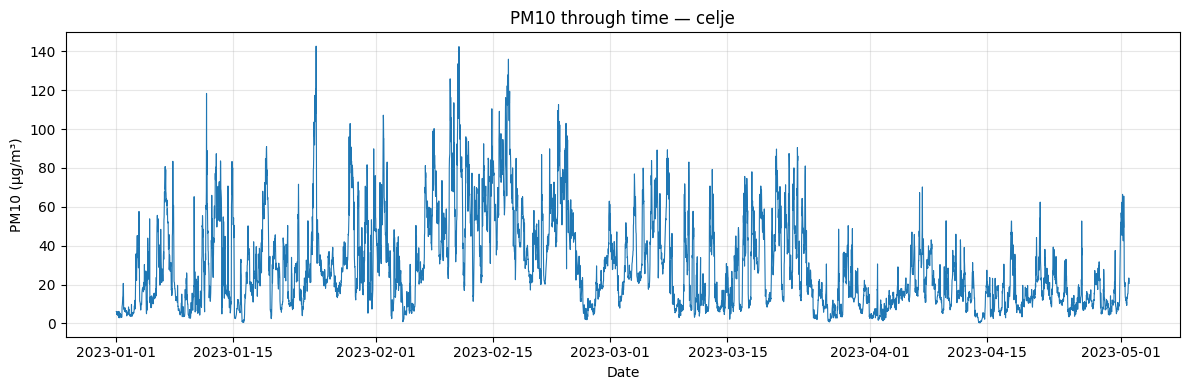

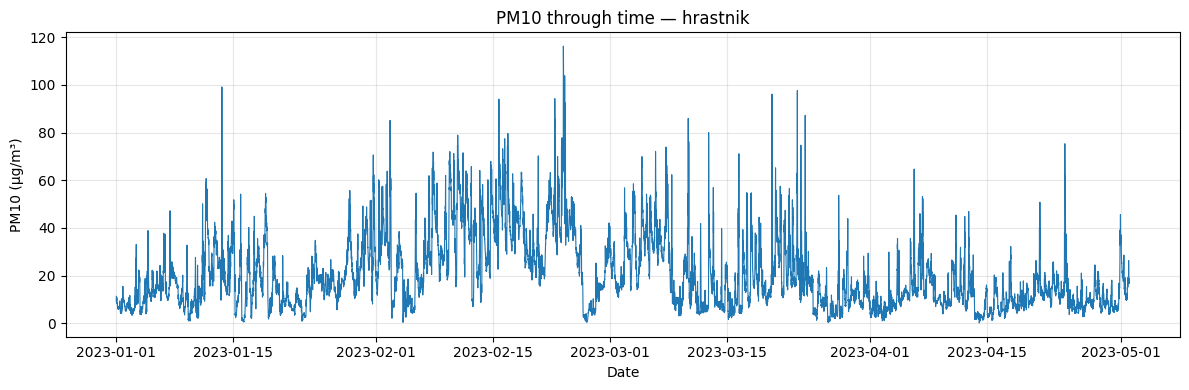

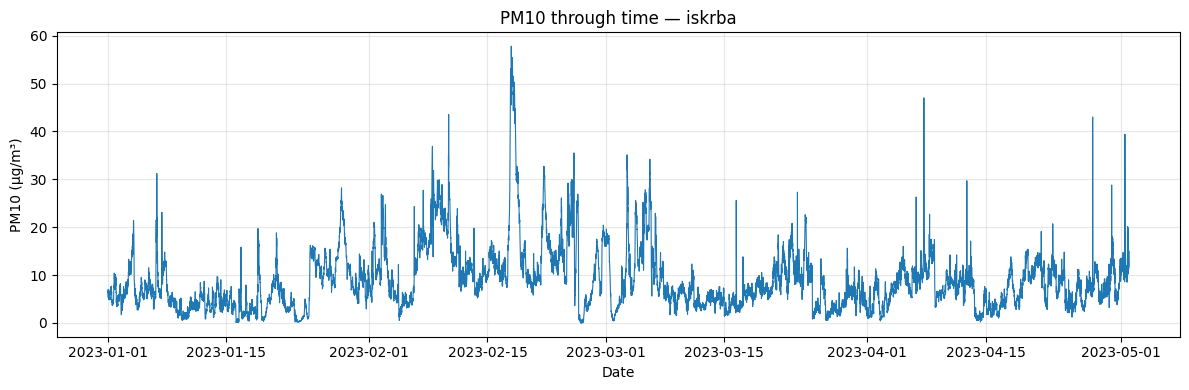

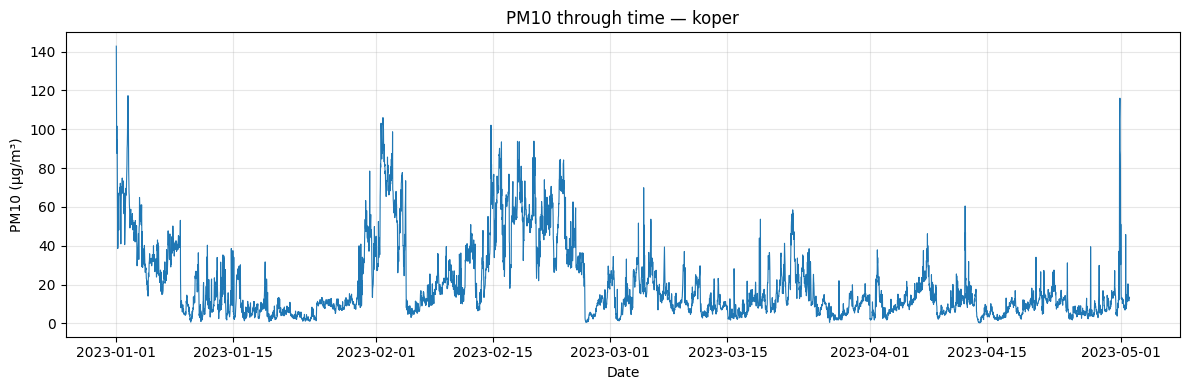

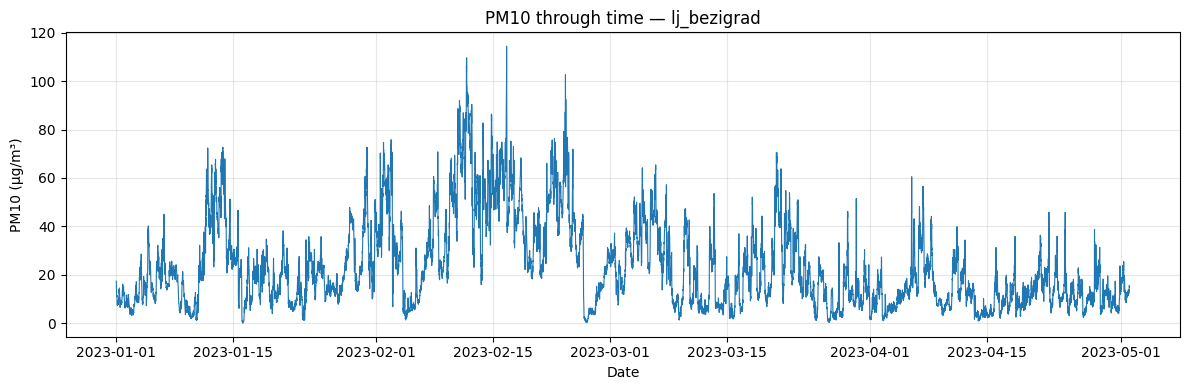

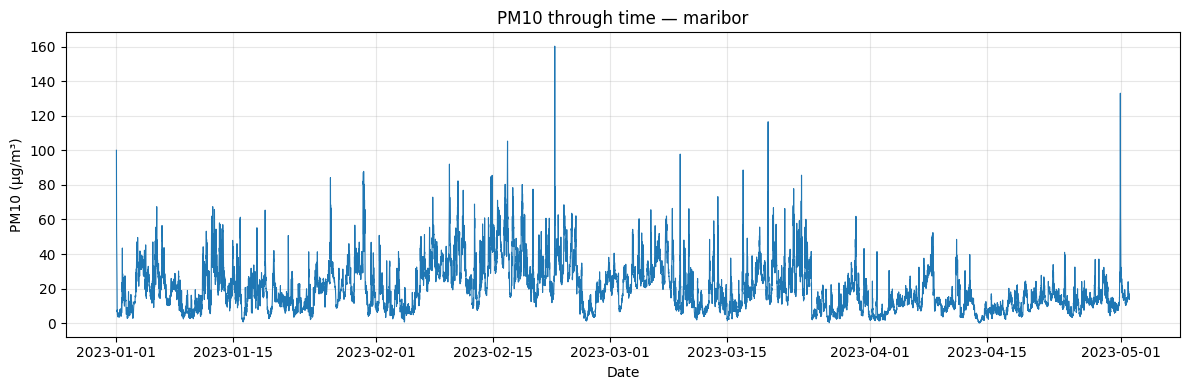

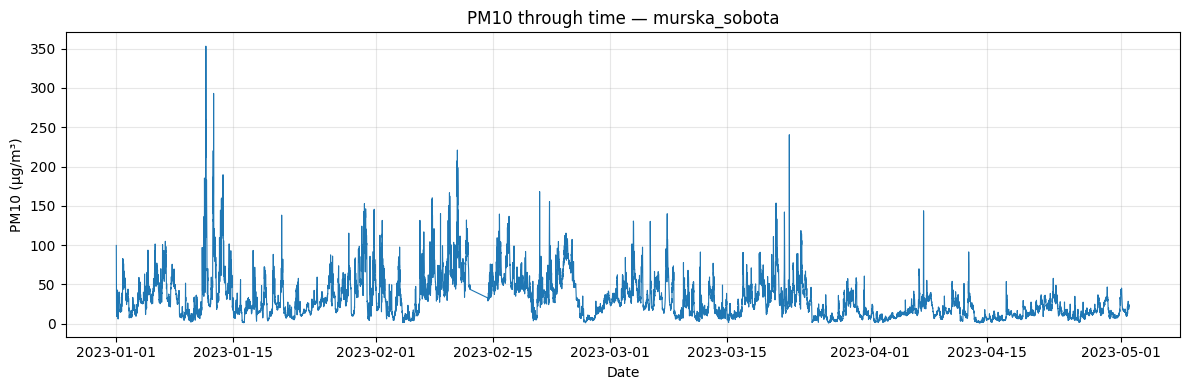

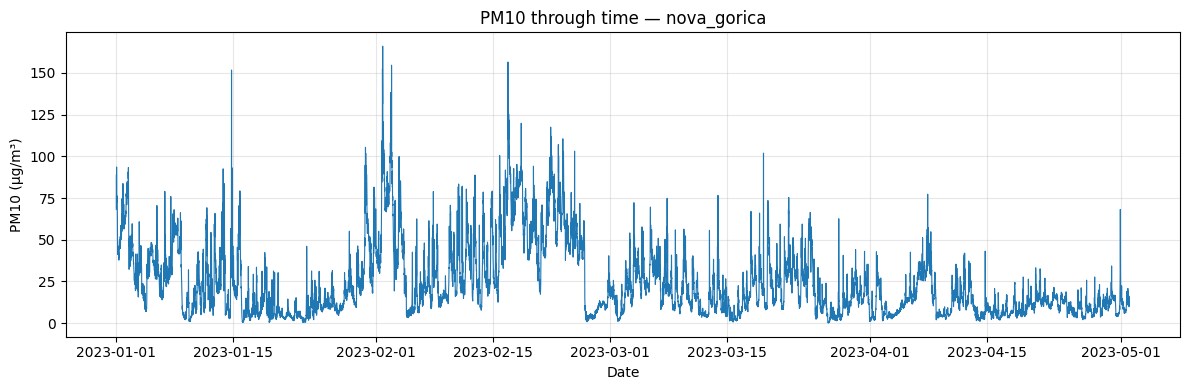

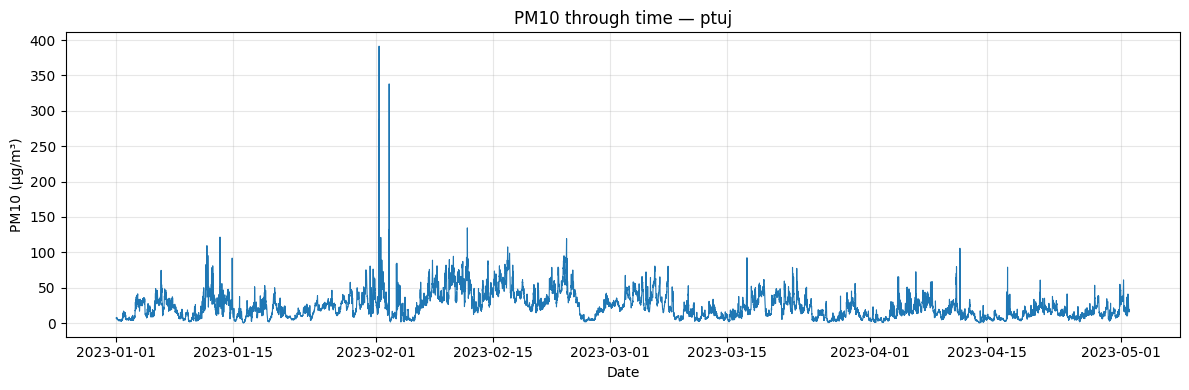

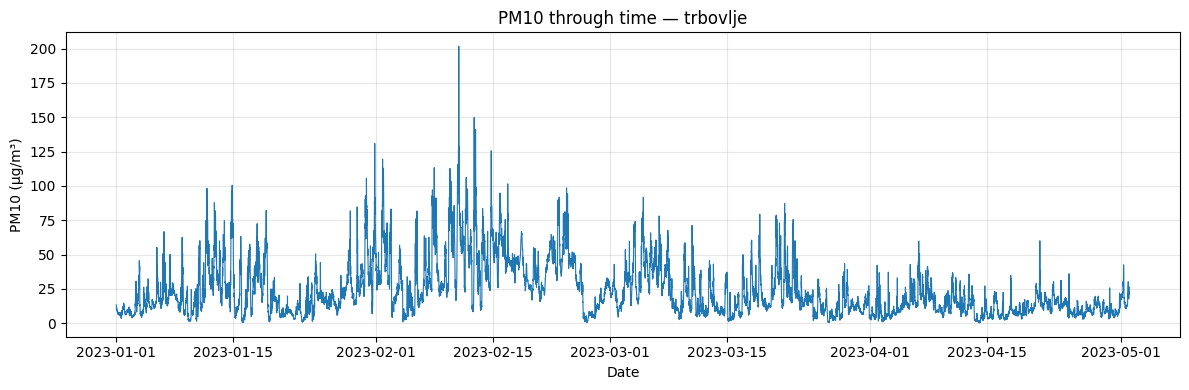

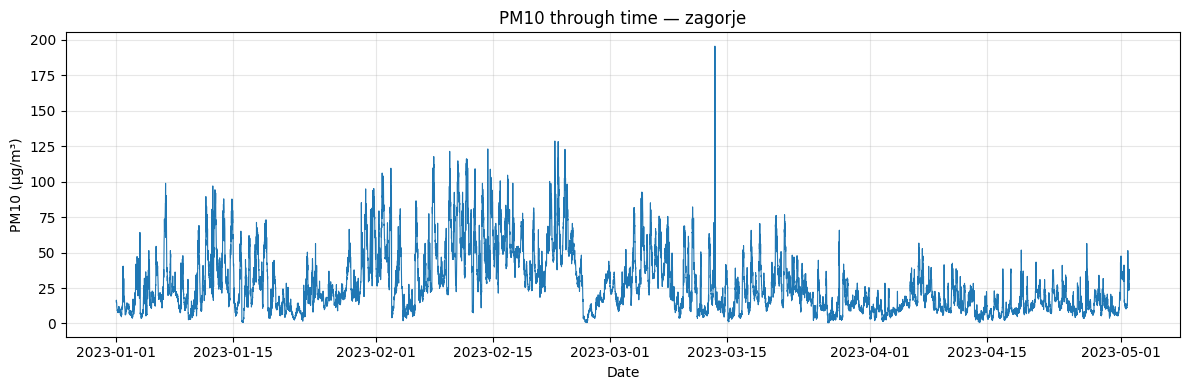

In [343]:
import matplotlib.pyplot as plt

cities = df_merged["mesto"].unique()

for city in cities:
    subset = df_merged[df_merged["mesto"] == city]

    plt.figure(figsize=(12, 4))
    plt.plot(subset["datum_zajema"], subset["pm10 [µg/m³]"], linewidth=0.8)
    plt.title(f"PM10 through time — {city}")
    plt.xlabel("Date")
    plt.ylabel("PM10 (µg/m³)")
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


In [344]:
raise SystemExit

SystemExit: 

C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
import pmdarima as pm

cities = df["mesto"].unique()
models_arima = {}

for city in cities:
    print("Fitting ARIMA for:", city)
    sdf = df[df["mesto"] == city].set_index("datum_zajema")["vrednost"]

    # Optional: infer sampling frequency
    sdf = sdf.asfreq(sdf.index.inferred_freq)
    sdf = sdf.dropna()


    model = pm.auto_arima(
        sdf,
        seasonal=False,
        stepwise=True,
        suppress_warnings=True,
        max_p=5, max_q=5, max_d=2
    )
    
    models_arima[city] = model
    print(model.summary())
    print("\n" + "-"*80 + "\n")


Fitting ARIMA for: Solkan


In [ ]:
city_dfs = {}

for city in df['mesto'].unique():
    sdf = df[df['mesto'] == city].copy()
    sdf['datum_zajema'] = pd.to_datetime(sdf['datum_zajema'])
    sdf = sdf.set_index('datum_zajema')
    sdf = sdf.sort_index()
    city_dfs[city] = sdf['vrednost']


488
predicted=18.133, expected=12.800
predicted=24.644, expected=33.600
predicted=19.972, expected=18.700
predicted=18.250, expected=23.800
predicted=30.081, expected=12.200
predicted=15.173, expected=9.100
predicted=14.723, expected=11.400
predicted=15.047, expected=8.700
predicted=11.568, expected=22.700
predicted=17.783, expected=12.000
predicted=13.010, expected=45.700
predicted=27.057, expected=29.100
predicted=23.541, expected=28.800
predicted=30.646, expected=46.800
predicted=32.464, expected=31.600
predicted=30.325, expected=27.900
predicted=37.600, expected=32.200
predicted=29.383, expected=21.800
predicted=26.958, expected=15.800
predicted=27.467, expected=55.800
predicted=34.540, expected=48.300
predicted=37.712, expected=19.800
predicted=38.335, expected=17.800
predicted=24.866, expected=15.800
predicted=16.204, expected=40.300
predicted=34.468, expected=60.600
predicted=43.444, expected=51.800
predicted=44.851, expected=7.000
predicted=29.761, expected=21.500
predicted=24.

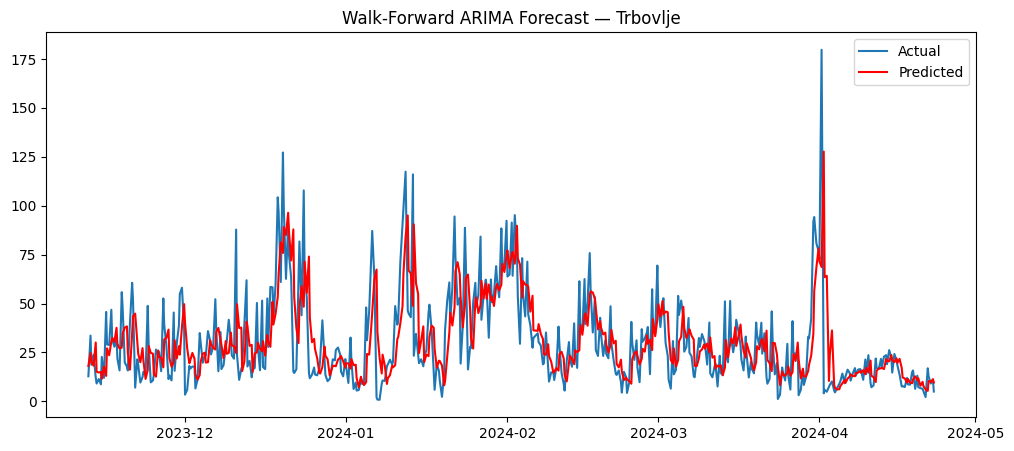

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# Example: pick one city
city = 'Trbovlje'  # replace with your city
sdf = city_dfs[city].dropna()
sdf_hourly_exact = sdf[sdf.index.minute == 0]
sdf_10h = sdf[(sdf.index.minute == 0) & (sdf.index.hour % 10 == 0)]


# convert to numpy array
X = sdf_10h.values

# split into train and test sets (e.g., 66% train)
size = int(len(X) * 0.66)
train, test = X[:size], X[size:]
history = list(train)
predictions = []
print(len(test))
# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(5, 1, 0))  # adjust (p,d,q) if needed
    model_fit = model.fit()
    
    # forecast 1 step ahead
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    
    # add actual observation to history
    obs = test[t]
    history.append(obs)
    
    print(f'predicted={yhat:.3f}, expected={obs:.3f}')

# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print(f'Test RMSE: {rmse:.3f}')

# plot forecasts vs actual
plt.figure(figsize=(12, 5))
plt.plot(sdf_10h.index[size:], test, label='Actual')
plt.plot(sdf_10h.index[size:], predictions, color='red', label='Predicted')
plt.title(f'Walk-Forward ARIMA Forecast — {city}')
plt.legend()
plt.show()



Processing city: Solkan

Test size: 204
Solkan — Test RMSE: 2.244


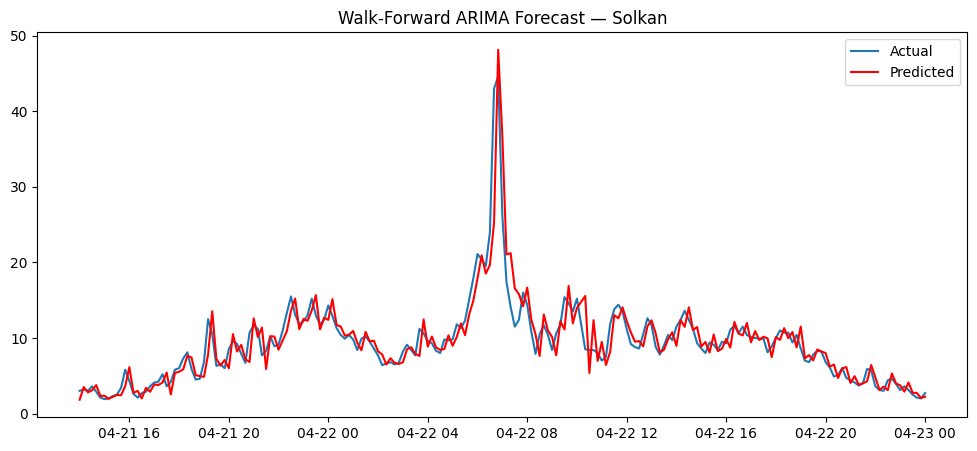


Processing city: CE Ljubljanska

Test size: 204
CE Ljubljanska — Test RMSE: 2.577


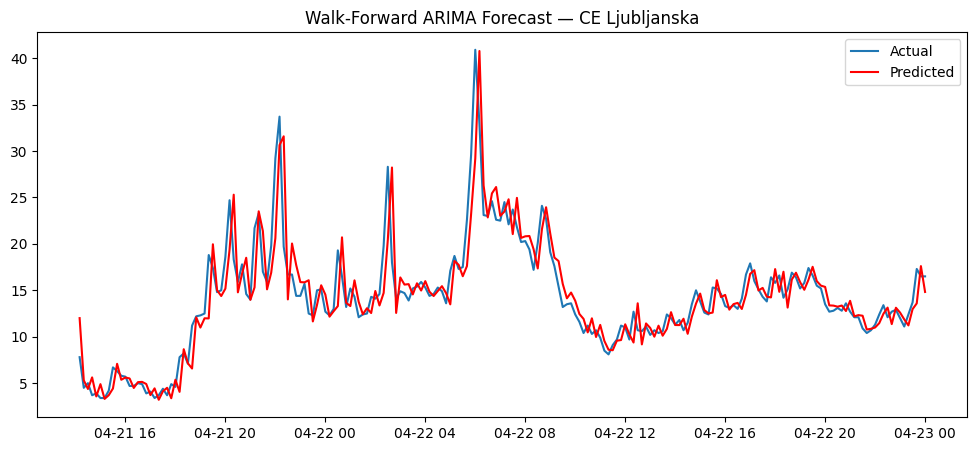


Processing city: Hrastnik

Test size: 204
Hrastnik — Test RMSE: 1.562


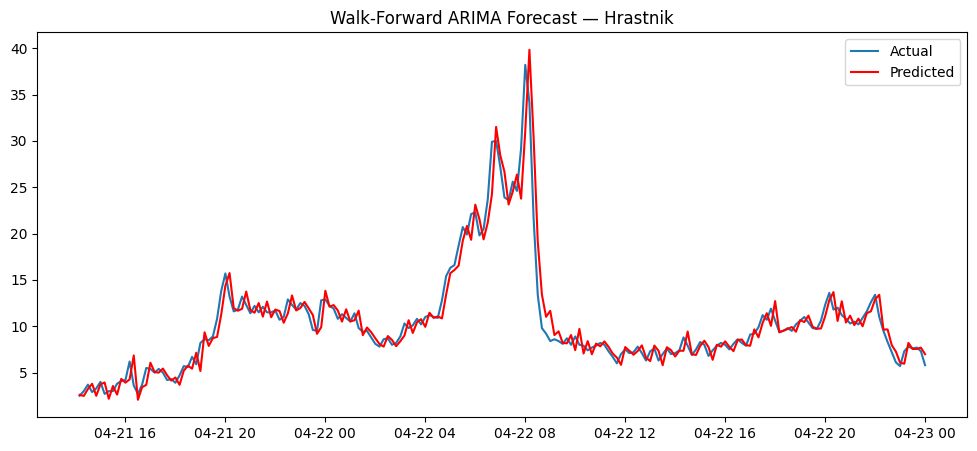


Processing city: MS Rakičan

Test size: 204
MS Rakičan — Test RMSE: 6.131


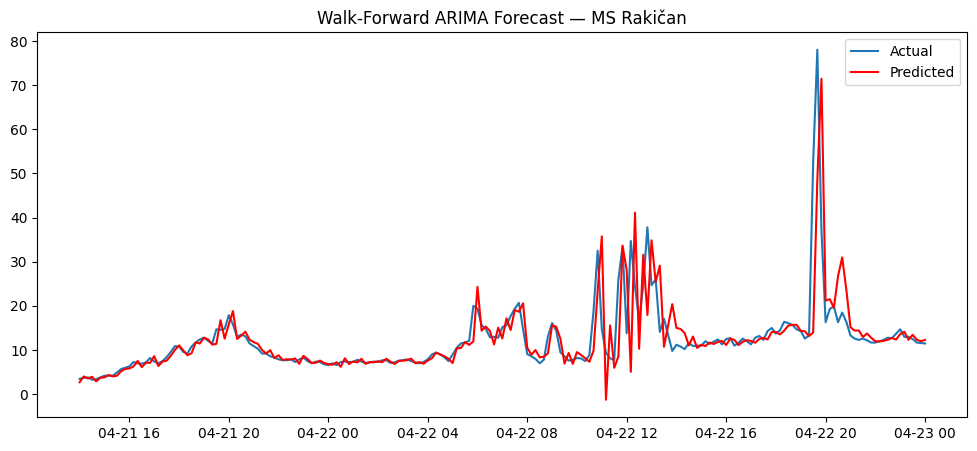


Processing city: Zagorje

Test size: 204
Zagorje — Test RMSE: 1.648


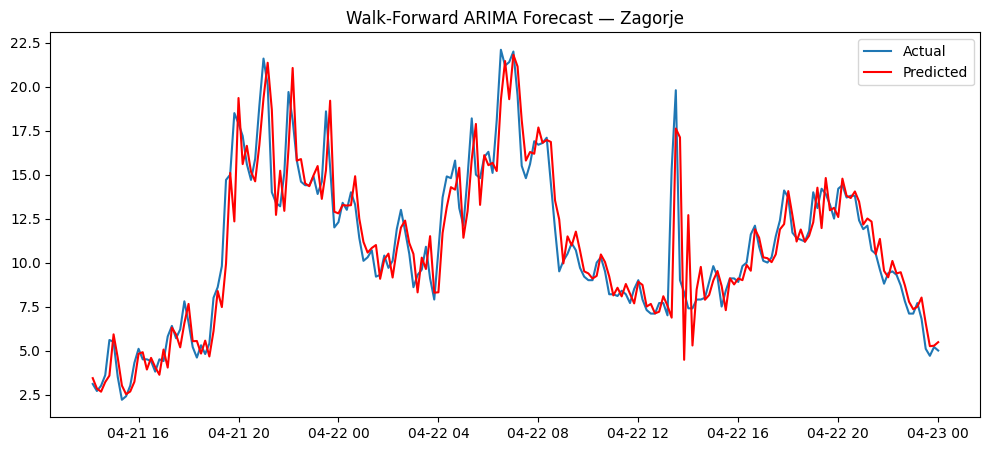


Processing city: Ptuj

Test size: 204
Ptuj — Test RMSE: 1.095


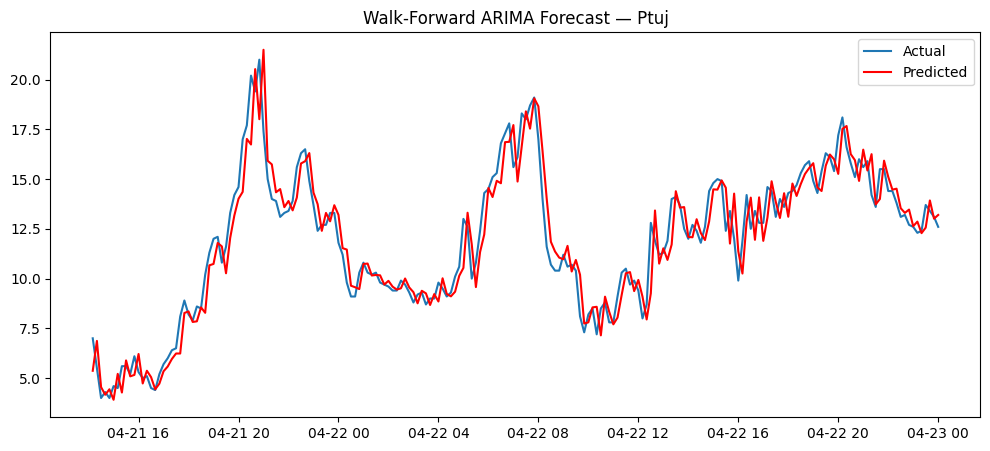


Processing city: Koper

Test size: 204
Koper — Test RMSE: 0.922


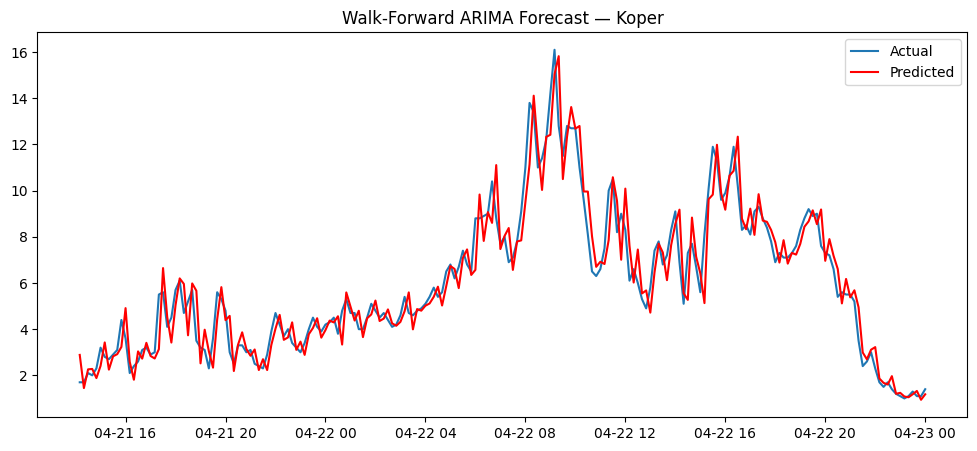


Processing city: NG Grčna

Test size: 204
NG Grčna — Test RMSE: 1.077


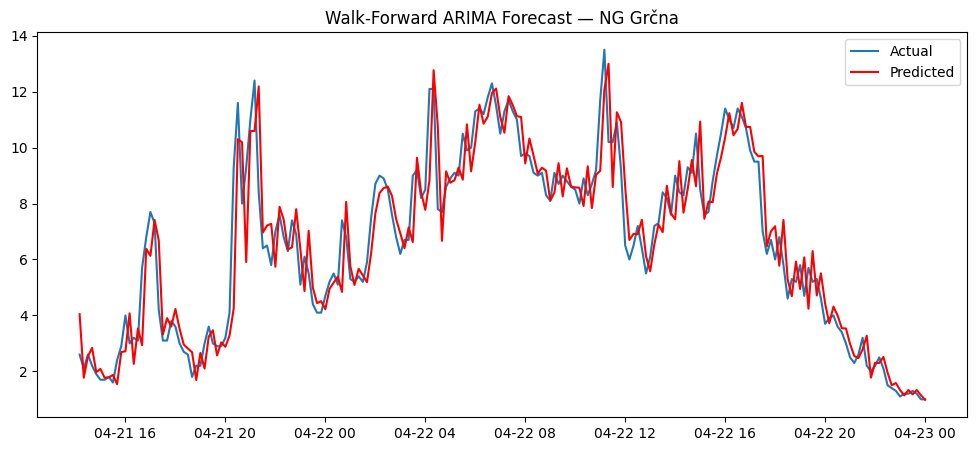


Processing city: CE bolnica

Test size: 204
CE bolnica — Test RMSE: 1.673


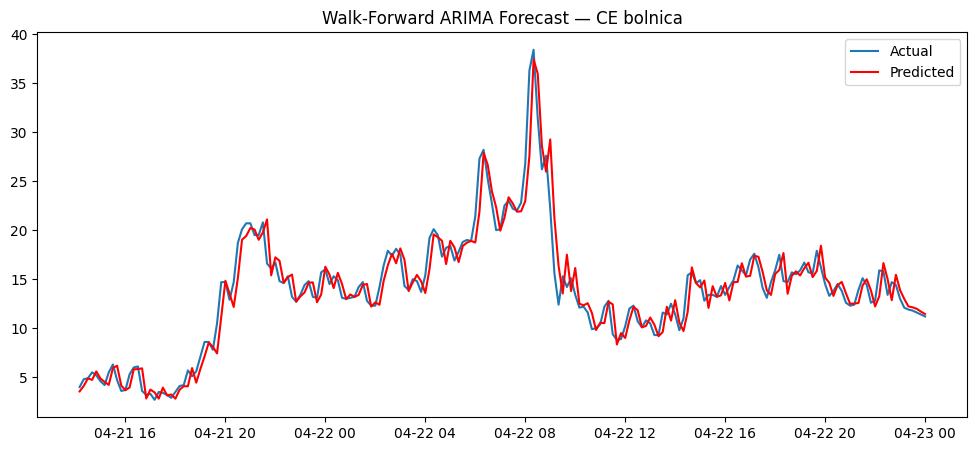


Processing city: Iskrba

Test size: 204


KeyboardInterrupt: 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# loop over all ARIMA cities
for city in city_dfs.keys():
    print(f"\n====================")
    print(f"Processing city: {city}")
    print(f"====================\n")

    # get data
    sdf = city_dfs[city].dropna()

    # take values every 10 hours exactly
    sdf_10h = sdf[(sdf.index.minute == 0) & (sdf.index.hour % 10 == 0)]
    sdf_small = sdf.tail(600)

    # convert to numpy array
    X = sdf_small.values

    if len(X) < 20:
        print(f"❌ Not enough data for {city}, skipping.")
        continue

    # split into train/test
    size = int(len(X) * 0.66)
    train, test = X[:size], X[size:]
    history = list(train)
    predictions = []

    print(f"Test size: {len(test)}")

    # walk-forward validation
    for t in range(len(test)):
        model = ARIMA(history, order=(5, 1, 0))   # you can adjust the order
        model_fit = model.fit()

        # predict 1 step ahead
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)

        # update history with actual value
        history.append(test[t])

    # RMSE
    rmse = sqrt(mean_squared_error(test, predictions))
    print(f"{city} — Test RMSE: {rmse:.3f}")

    # plotting
    plt.figure(figsize=(12, 5))
    plt.plot(sdf_small.index[size:], test, label='Actual')
    plt.plot(sdf_small.index[size:], predictions, color='red', label='Predicted')
    plt.title(f"Walk-Forward ARIMA Forecast — {city}")
    plt.legend()
    plt.show()
    # TODO: naredi napoved samo iz zadnjih recimo 1000 podatkov za naslednje točke (če je to smiselno). poskusi še SARIMO, itd.
    # razmisli, kako točno bomo definirali te napovedi potem za vizualizacijo.


making a wind + pm10 dataset for prediction and visualization


In [ ]:
import pandas as pd
from geopy.distance import geodesic

# --- Step 1: Load your dataset ---
# Assuming CSV looks like: Name,Lat,Lon,...
df_slo = pd.read_csv("si_cities_locations.csv")

# --- Step 2: List of wind stations and PM10 stations ---
wind_stations_list = [
    "Ambrož pod Krvavcem", "Arnovo selo", "Babno Polje", "Bele Vode", 
    "Belšinja vas", "Bilje", "Bilje", "Bizeljsko", "Bled", 
    "Bohinjska Bistrica", "Bohinjska Češnjica", "Breg (Žirovnica)", "Bukovo", 
    "Cankova", "Celje Medlog", "Cerklje - letališče", "Cerknica", "Cerkno", 
    "Cerovec pri Črešnjevcu", "Cirkulane", "Čemšenik", "Črešnjevec (Slovenska Bistrica)", 
    "Črni Vrh (Idrija)", "Črni Vrh (Polhov Gradec)", "Črnivec", "Črnomelj - Dobliče", 
    "Davča", "Dekani", "Dobrnič", "Dolenje Medvedje selo", "Domžale", "Dravograd", 
    "Dražgoše", "Dvor", "Fužina", "Godnje", "Gomilsko", "Gorenjci pri Adlešičih", 
    "Gorenje Blato", "Gornji Grad", "Gradišče (Slovenj Gradec)", "Grm", "Grosuplje", 
    "Grčarice", "Hotedršica", "Hrastovica (Mokronog)", "Hrib - Loški Potok", 
    "Hrib - Loški Potok", "Hrušica pri Colu", "Javorniški Rovt", "Javorniški Rovt", 
    "Jermanka", "Jeronim", "Kadrenci", "Kal pri Krmelju", "Kamniška Bistrica", 
    "Kančevci", "Knape", "Kneške Ravne", "Kobilje", "Kostanjevica - Brod", "Kozina", 
    "Kozji Vrh", "Kočevje", "Kranjska Gora", "Kredarica", "Laško", "Lendava", 
    "Leskovica", "Letališče Jožeta Pučnika Ljubljana", "Lig Čolnica", "Lipe", 
    "Lisca", "Ljubljana Bežigrad", "Ljubljana Dobrunje", "Ljubljana Šentvid", "Logatec", 
    "Lokve (Nova Gorica)", "Ložice", "Luče", "Lučine", "METLIKA", "Malkovec", 
    "Maribor - letališče", "Maribor Vrbanski plato", "Martinj Vrh", "Martinje", 
    "Mačkovci", "Metni Vrh", "Mokronog - Hrastovica", "Moravče", "Movraž", 
    "Murska Sobota", "Nova vas (Bloke)", "Novi Lazi", "Novo mesto", "Opatje selo", 
    "Otlica", "Planina - Hasberg", "Planina v Podbočju", "Plave", "Podbrdo", 
    "Podgorje (Apače)", "Podgorje (Apače)", "Podlipje", "Podljubelj", "Podpeca", 
    "Podraga", "Podsreda", "Podzemelj", "Podčetrtek", "Polički Vrh", "Poljane nad Škofjo Loko", 
    "Portorož - letališče", "Postojna", "Predgrad", "Prigorica", "Ptuj", "Ptujska Gora", 
    "Radegunda", "Rakitovec (Koper)", "Rateče", "Rateče", "Razdrto", "Ribnica na Pohorju", 
    "Rovte", "Samotorica", "Sela na Krasu", "Selo pri Vodicah", "Semič", "Sevnica", 
    "Sevno (Šmartno pri Litiji)", "Seča", "Sinji Vrh", "Slovenske Konjice", "Smednik", 
    "Sodražica", "Solčava", "Soča", "Spodnji Dolič", "Srednja Bistrica", "Sromlje", 
    "Strojna", "Strunjan", "Šempas", "Šentilj v Slovenskih goricah", "Šentjošt nad Horjulom", 
    "Šentjur", "Škofja Loka", "Šmarata", "Šmartno pri Slovenj Gradcu", "Topol pri Medvodah", 
    "Trava", "Trava", "Trenta", "Tržič", "Vedrijan", "Veržej", "Vinji Vrh", 
    "Vinji Vrh pri Beli Cerkvi", "Vogel", "Vojnik", "Vojsko (Idrija)", "Vrbnje", "Vrhnika", 
    "Zagorci", "Zalošče", "Zbelovska Gora", "Zgornja Radovna", "Zgornja Sorica", 
    "Zgornje Jezersko", "Zgornje Loke pri Blagovici", "Zgornji Kamenščak", "Zgornji Tuhinj", 
    "Železniki", "Želimlje", "Žerjav", "Žetale", "Žiri", "Žusem (Dobrina)"
]


pm10_stations_list = [
    'Solkan', 'Hrastnik',
    'Ptuj', 'Koper', 'NG Grčna', 'CE bolnica', 'Iskrba', 'LJ Bežigrad',
    'MB Titova', 'MS Cankarjeva'
]

# --- Step 3: Filter wind stations from your dataset ---
wind_df = df_slo[df_slo['city'].isin(wind_stations_list)].copy()
print(f"Found {len(wind_df)} wind stations in dataset")

# --- Step 4: Filter PM10 stations that exist in dataset ---
pm10_df = df_slo[df_slo['city'].isin(pm10_stations_list)].copy()
print(f"Found {len(pm10_df)} PM10 stations in dataset")

# --- Step 5: Find nearest wind station for each PM10 station ---
nearest_mapping = []

for _, pm_row in pm10_df.iterrows():
    pm_name = pm_row['city']
    pm_coord = (pm_row['lat'], pm_row['lng'])
    
    # Compute distance to all wind stations
    wind_df['distance_km'] = wind_df.apply(
        lambda row: geodesic(pm_coord, (row['lat'], row['lng'])).km, axis=1
    )
    
    # Find the closest
    nearest_wind = wind_df.loc[wind_df['distance_km'].idxmin()]
    
    nearest_mapping.append({
        "PM10_station": pm_name,
        "Wind_station": nearest_wind['city'],
        "Distance_km": nearest_wind['distance_km']
    })

nearest_df = pd.DataFrame(nearest_mapping)
print(nearest_df)


Found 41 wind stations in dataset
Found 4 PM10 stations in dataset
  PM10_station Wind_station  Distance_km
0        Koper       Dekani     6.358140
1         Ptuj         Ptuj     0.000000
2     Hrastnik        Laško     6.693557
3       Solkan        Bilje     8.114785


In [ ]:
wind_stations_list_closest = [
    
    "Portorož", "Celje Medlog", "Kočevje", 'Ljubljana Bežigrad', 
    "Maribor Vrbanski plato", 'Murska Sobota']

pm10_stations_list = [
    
    'Koper', 'CE bolnica', 'Iskrba', 'LJ Bežigrad',
    'MB Titova', 'MS Cankarjeva'
]

In [ ]:
import pandas as pd

# --- 1. WIND STATION CSV FILENAMES ---
files = {
    "Koper": "veter_portoroz_(koper)",
    "Celje_Medlog": "veter_celje",
    "Kocevje": "veter_kocevje",
    "Ljubljana_Bezigrad": "veter_lj",
    "Maribor_Vrbanski_plato": "veter_maribor",
    "Murska_Sobota": "veter_murska_sobota"
}

# --- 2. LOAD FIRST FILE AS BASE ---
combined = None

for city, file in files.items():
    df_combined = pd.read_csv(file)
    df_combined.columns = df_combined.columns.str.strip()
    # Keep only: timestamp, direction, speed
    df_combined = df_combined[["valid", "smer vetra [°]", "hitrost vetra [m/s]"]]

    # Rename columns for this city
    df_combined = df_combined.rename(columns={
        "smer vetra [°]": f"{city}_dir",
        "hitrost vetra [m/s]": f"{city}_speed"
    })

    # Convert timestamp to datetime (important!)
    df_combined["valid"] = pd.to_datetime(df_combined["valid"])

    # Merge on timestamp
    if combined is None:
        combined = df_combined
    else:
        combined = combined.merge(df_combined, on="valid", how="outer")

# Sort by timestamp
combined = combined.sort_values("valid")

# Save result
combined.to_csv("wind_all_stations_combined.csv", index=False)

print("Done! Combined CSV saved.")


Done! Combined CSV saved.


In [ ]:
combined

,valid,Koper_dir,Koper_speed,Celje_Medlog_dir,Celje_Medlog_speed,Kocevje_dir,Kocevje_speed,Ljubljana_Bezigrad_dir,Ljubljana_Bezigrad_speed,Maribor_Vrbanski_plato_dir,Maribor_Vrbanski_plato_speed,Murska_Sobota_dir,Murska_Sobota_speed
0,2023-01-01 07:00:00,SW,0.9,W,4.7,NE,1.3,SW,1.1,WNW,1.4,W,1.7
1,2023-01-01 14:00:00,S,2.3,WSW,6.3,NW,1.3,SW,4.1,WSW,4.2,NW,1.3
2,2023-01-01 21:00:00,ESE,1.5,SW,1.4,C,0.0,SW,1.7,NW,1.3,WSW,0.8
3,2023-01-02 07:00:00,W,0.9,WSW,4.7,C,0.0,WSW,3.1,SSW,1.3,NE,0.2
4,2023-01-02 14:00:00,WNW,1.3,WSW,7.7,C,0.0,SW,3.0,S,2.9,SW,6.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1432,2024-04-22 14:00:00,ENE,2.7,E,5.1,C,0.0,E,3.7,ENE,2.9,ENE,4.7
1433,2024-04-22 21:00:00,ENE,9.6,NE,2.0,C,0.0,ENE,3.1,NE,1.9,NE,3.8
1434,2024-04-23 07:00:00,ESE,3.8,WSW,2.5,C,0.0,NE,2.5,W,3.0,NNE,4.3
1435,2024-04-23 14:00:00,ENE,4.2,WSW,2.2,C,0.0,NNE,0.3,W,3.7,NNE,3.3


In [ ]:
df_pm10 = df
df_pm10

,datum_zajema,vrednost,mesto
0,2023-01-01 01:00:00,33.3,Solkan
1,2023-01-01 01:00:00,8.4,CE Ljubljanska
2,2023-01-01 01:00:00,11.3,Hrastnik
3,2023-01-01 01:00:00,12.4,MS Rakičan
4,2023-01-01 01:00:00,15.1,Zagorje
...,...,...,...
1021925,2024-04-23 00:00:00,2.7,Solkan
1021926,2024-04-23 00:00:00,5.0,Trbovlje
1021927,2024-04-23 00:00:00,11.5,MS Rakičan
1021928,2024-04-23 00:00:00,16.5,CE Ljubljanska


In [ ]:
pm10_to_wind = {
    "Koper": "Koper",
    "CE bolnica": "Celje_Medlog",
    "Iskrba": "Kocevje",
    "LJ Bežigrad": "Ljubljana_Bezigrad",
    "MB Titova": "Maribor_Vrbanski_plato",
    "MS Cankarjeva": "Murska_Sobota",
}


In [ ]:
import pandas as pd

# files = {} (your dict from before)

wind_dfs = {}

for city, file in files.items():
    df = pd.read_csv(file)
    df.columns = df.columns.str.strip()
    
    # Clean and select
    df = df[["valid", "smer vetra [°]", "hitrost vetra [m/s]"]]
    
    df["valid"] = pd.to_datetime(df["valid"])
    
    df = df.rename(columns={
        "valid": "timestamp",
        "smer vetra [°]": "wind_dir",
        "hitrost vetra [m/s]": "wind_speed"
    })
    
    wind_dfs[city] = df.sort_values("timestamp")


In [ ]:
result_frames = []

df_pm10 = df_pm10.rename(columns={"datum_zajema": "timestamp"})
df_pm10["timestamp"] = pd.to_datetime(df_pm10["timestamp"])

for pm_city, wind_city in pm10_to_wind.items():
    
    # PM10 subset
    pm_sub = df_pm10[df_pm10["mesto"] == pm_city].copy()
    pm_sub = pm_sub.sort_values("timestamp")
    
    # wind subset
    wind_sub = wind_dfs[wind_city]
    
    # merge nearest wind data
    merged = pd.merge_asof(
        pm_sub,
        wind_sub,
        on="timestamp",
        direction="nearest",
        tolerance=pd.Timedelta("6h")
    )
    
    #merged["wind_station"] = wind_city
    result_frames.append(merged)

# Combine everything
final_df = pd.concat(result_frames, ignore_index=True)
final_df = final_df.sort_values("timestamp")

final_df = final_df.rename(columns={
    "vrednost": "PM10",
    "mesto": "city"
})


In [ ]:
pm10_wind_combined_data = final_df
pm10_wind_combined_data.to_csv("pm10_wind_combined_data.csv", index=False)


In [ ]:
pm10_wind_combined_data

,timestamp,PM10,city,wind_dir,wind_speed
0,2023-01-01 01:00:00,142.8,Koper,SW,0.9
205945,2023-01-01 01:00:00,17.4,LJ Bežigrad,SW,1.1
137183,2023-01-01 01:00:00,5.4,Iskrba,NE,1.3
340240,2023-01-01 01:00:00,99.6,MS Cankarjeva,W,1.7
68426,2023-01-01 01:00:00,6.1,CE bolnica,W,4.7
...,...,...,...,...,...
137182,2024-04-23 00:00:00,11.2,CE bolnica,NE,2.0
340239,2024-04-23 00:00:00,10.6,MB Titova,NE,1.9
205944,2024-04-23 00:00:00,4.0,Iskrba,C,0.0
273510,2024-04-23 00:00:00,4.0,LJ Bežigrad,ENE,3.1


Number of rows in zoomed window: 870


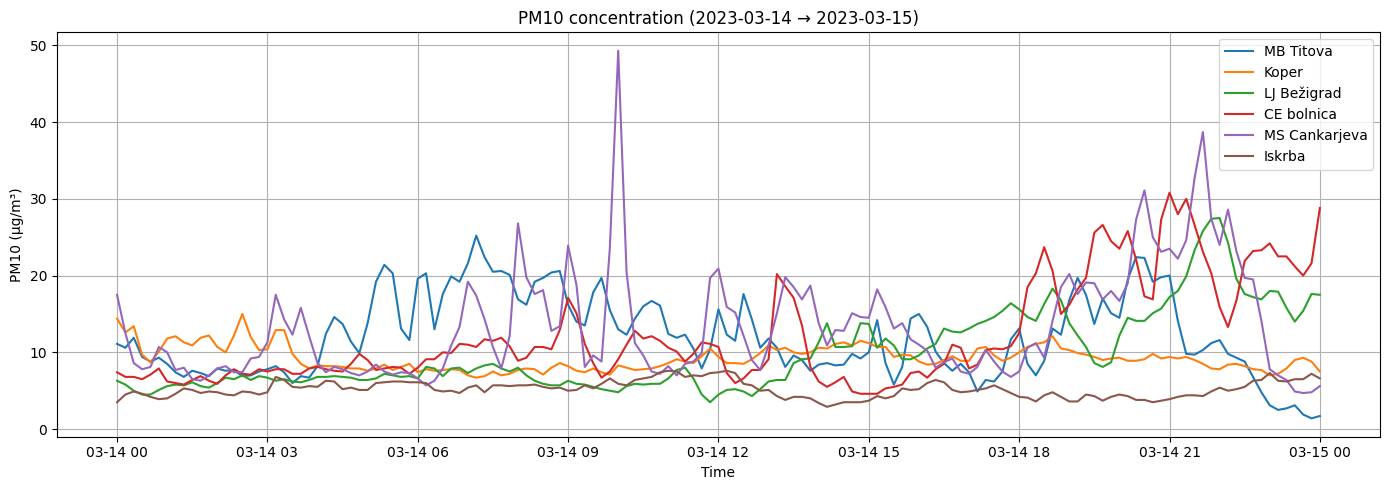

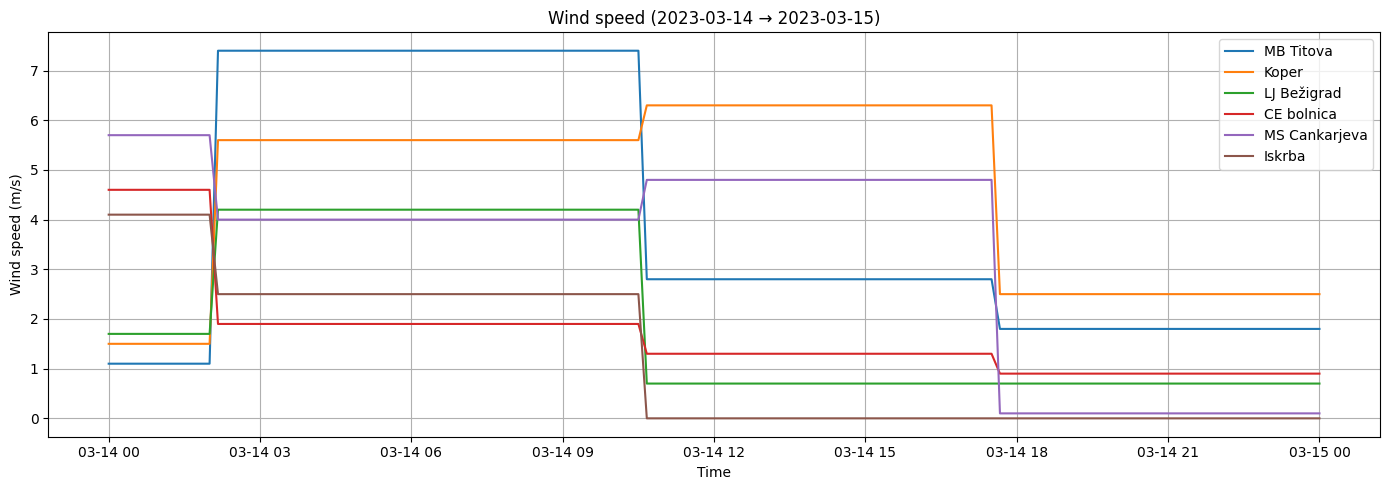

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt

# Load your merged dataset
df = pd.read_csv("pm10_wind_combined_data.csv", parse_dates=["timestamp"])
df = df.sort_values("timestamp")

# --- CHOOSE YOUR ZOOM RANGE HERE ---
start = "2023-03-14"
stop  = "2023-03-15"

# Filter for the chosen interval
df_zoom = df[(df["timestamp"] >= start) & (df["timestamp"] <= stop)]

print("Number of rows in zoomed window:", len(df_zoom))

# -------------------------------------------------------
# 1) PM10 TIME SERIES ZOOMED
# -------------------------------------------------------
plt.figure(figsize=(14, 5))
for city in df_zoom.city.unique():
    sub = df_zoom[df_zoom.city == city]
    plt.plot(sub.timestamp, sub.PM10, label=city)

plt.title(f"PM10 concentration ({start} → {stop})")
plt.xlabel("Time")
plt.ylabel("PM10 (µg/m³)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# -------------------------------------------------------
# 2) WIND SPEED TIME SERIES ZOOMED
# -------------------------------------------------------
plt.figure(figsize=(14, 5))
for city in df_zoom.city.unique():
    sub = df_zoom[df_zoom.city == city]
    plt.plot(sub.timestamp, sub.wind_speed, label=city)

plt.title(f"Wind speed ({start} → {stop})")
plt.xlabel("Time")
plt.ylabel("Wind speed (m/s)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## -------------------------------------------------------
## 3) WIND DIRECTION TIME SERIES ZOOMED
## -------------------------------------------------------
#plt.figure(figsize=(14, 5))
#for city in df_zoom.city.unique():
#    sub = df_zoom[df_zoom.city == city]
#    plt.plot(sub.timestamp, sub.wind_dir, label=city)
#
#plt.title(f"Wind direction ({start} → {stop})")
#plt.xlabel("Time")
#plt.ylabel("Wind direction (°)")
#plt.yticks([0, 90, 180, 270, 360])
#plt.legend()
#plt.grid(True)
#plt.tight_layout()
#plt.show()
#
#TODO: najdi korelacijo med hitrostjo vetra in pm10 delci.

Number of rows for LJ Bežigrad in zoomed window: 1439


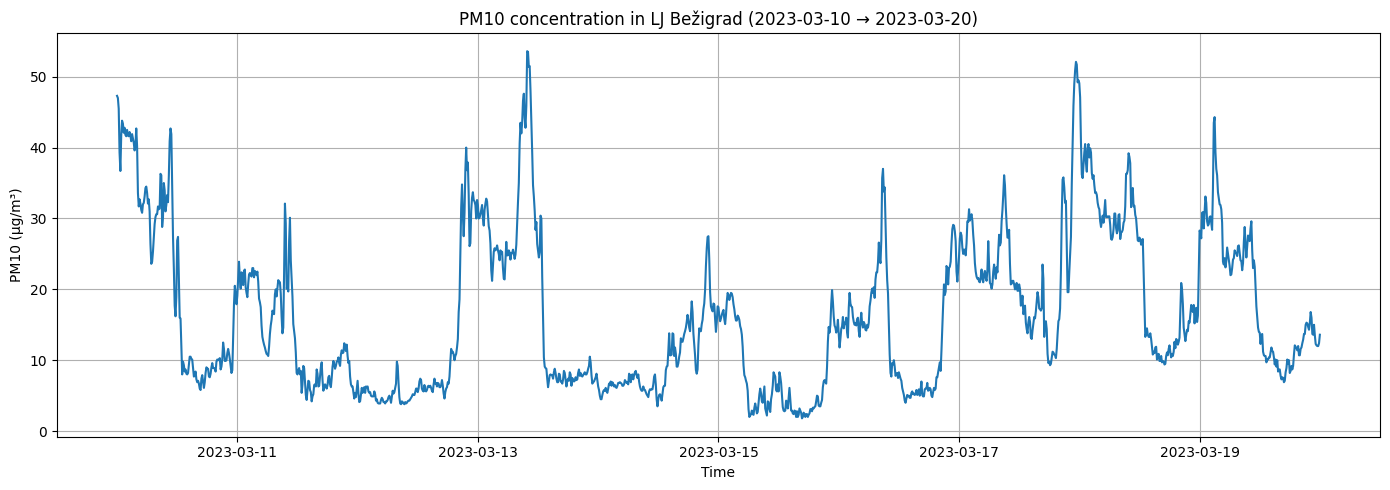

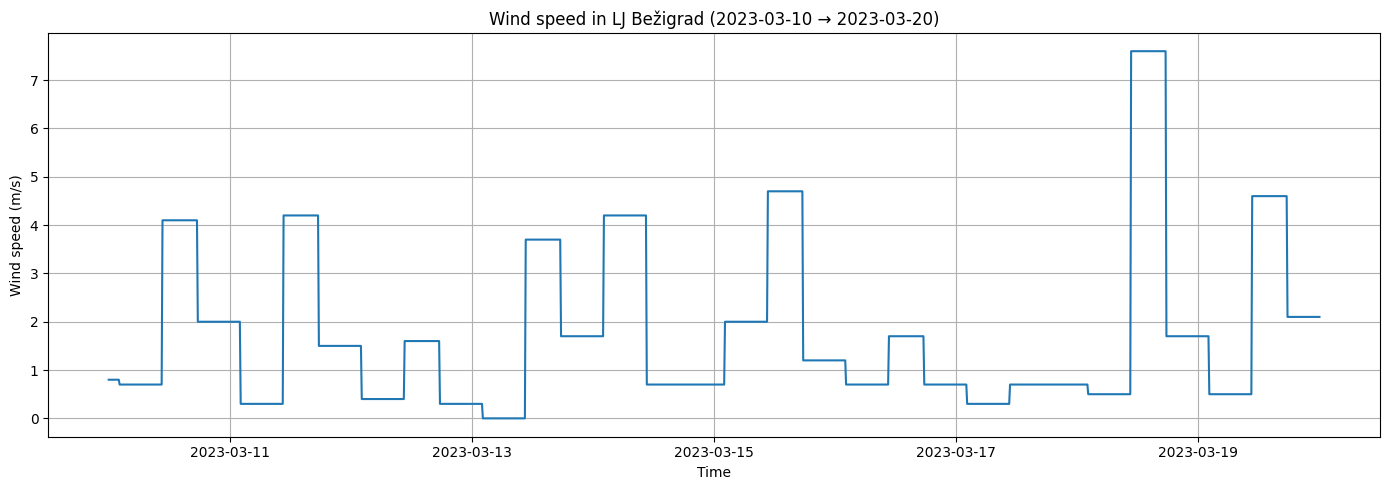

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your merged dataset
df = pd.read_csv("pm10_wind_combined_data.csv", parse_dates=["timestamp"])
df = df.sort_values("timestamp")

# --- CHOOSE YOUR ZOOM RANGE HERE ---
start = "2023-03-10"
stop  = "2023-03-20"

# --- CHOOSE YOUR CITY HERE ---
city_name = "LJ Bežigrad"  # replace with the city you want

# Filter for the chosen interval and city
df_city = df[(df["timestamp"] >= start) & (df["timestamp"] <= stop) & (df["city"] == city_name)]

print(f"Number of rows for {city_name} in zoomed window:", len(df_city))

# -------------------------------------------------------
# 1) PM10 TIME SERIES ZOOMED FOR ONE CITY
# -------------------------------------------------------
plt.figure(figsize=(14, 5))
plt.plot(df_city.timestamp, df_city.PM10)
plt.title(f"PM10 concentration in {city_name} ({start} → {stop})")
plt.xlabel("Time")
plt.ylabel("PM10 (µg/m³)")
plt.grid(True)
plt.tight_layout()
plt.show()

# -------------------------------------------------------
# 2) WIND SPEED TIME SERIES ZOOMED FOR ONE CITY
# -------------------------------------------------------
plt.figure(figsize=(14, 5))
plt.plot(df_city.timestamp, df_city.wind_speed)
plt.title(f"Wind speed in {city_name} ({start} → {stop})")
plt.xlabel("Time")
plt.ylabel("Wind speed (m/s)")
plt.grid(True)
plt.tight_layout()
plt.show()


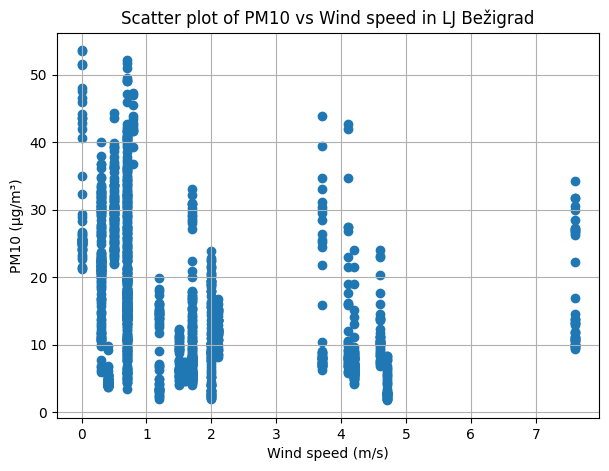

In [ ]:
plt.figure(figsize=(7,5))
plt.scatter(df_city.wind_speed, df_city.PM10)
plt.xlabel("Wind speed (m/s)")
plt.ylabel("PM10 (µg/m³)")
plt.title(f"Scatter plot of PM10 vs Wind speed in {city_name}")
plt.grid(True)
plt.show()


In [ ]:
from scipy.stats import pearsonr

corr, p_value = pearsonr(df_city.wind_speed, df_city.PM10)
print(f"Pearson correlation: {corr:.3f}, p-value: {p_value:.3f}")


Pearson correlation: -0.355, p-value: 0.000


napovedovanje - na novo

In [345]:
# Example split
split_date = df_merged["datum_zajema"].max() - pd.Timedelta(days=7)

train = df_merged[df_merged["datum_zajema"] <= split_date]
test  = df_merged[df_merged["datum_zajema"] > split_date]


In [346]:
df_merged

,datum_zajema,mesto,pm10 [µg/m³],padavine [mm],temperatura [°C],veter [m/s]
0,2023-01-01 01:00:00,celje,6.1,0.0,13.2,6.3
1,2023-01-01 01:30:00,celje,6.2,0.0,13.4,7.5
2,2023-01-01 02:00:00,celje,5.8,0.0,13.5,7.8
3,2023-01-01 02:30:00,celje,4.6,0.0,12.8,4.5
4,2023-01-01 03:00:00,celje,6.0,0.0,11.9,3.2
...,...,...,...,...,...,...
168030,2023-05-01 23:10:00,zagorje,24.5,NaN,12.9,0.3
168031,2023-05-01 23:20:00,zagorje,27.4,NaN,13.0,0.8
168032,2023-05-01 23:30:00,zagorje,32.8,NaN,13.0,0.4
168033,2023-05-01 23:40:00,zagorje,38.2,NaN,13.0,0.6


In [347]:
df_merged['datum_zajema']

0        2023-01-01 01:00:00
1        2023-01-01 01:30:00
2        2023-01-01 02:00:00
3        2023-01-01 02:30:00
4        2023-01-01 03:00:00
                 ...        
168030   2023-05-01 23:10:00
168031   2023-05-01 23:20:00
168032   2023-05-01 23:30:00
168033   2023-05-01 23:40:00
168034   2023-05-01 23:50:00
Name: datum_zajema, Length: 168035, dtype: datetime64[ns]

In [348]:
df_merged

,datum_zajema,mesto,pm10 [µg/m³],padavine [mm],temperatura [°C],veter [m/s]
0,2023-01-01 01:00:00,celje,6.1,0.0,13.2,6.3
1,2023-01-01 01:30:00,celje,6.2,0.0,13.4,7.5
2,2023-01-01 02:00:00,celje,5.8,0.0,13.5,7.8
3,2023-01-01 02:30:00,celje,4.6,0.0,12.8,4.5
4,2023-01-01 03:00:00,celje,6.0,0.0,11.9,3.2
...,...,...,...,...,...,...
168030,2023-05-01 23:10:00,zagorje,24.5,NaN,12.9,0.3
168031,2023-05-01 23:20:00,zagorje,27.4,NaN,13.0,0.8
168032,2023-05-01 23:30:00,zagorje,32.8,NaN,13.0,0.4
168033,2023-05-01 23:40:00,zagorje,38.2,NaN,13.0,0.6


In [349]:
# Use previous 1 hour as features (2 datapoints, 30 min each)
for lag in [1, 2]:
    df_merged[f"pm10_lag{lag}"] = df_merged.groupby("mesto")["pm10 [µg/m³]"].shift(lag)


In [350]:
df_merged["hour"] = df_merged["datum_zajema"].dt.hour
df_merged["minute"] = df_merged["datum_zajema"].dt.minute
df_merged["day_of_week"] = df_merged["datum_zajema"].dt.dayofweek
df_merged["day_of_year"] = df_merged["datum_zajema"].dt.dayofyear


In [351]:
df_merged = pd.get_dummies(df_merged, columns=["mesto"])


In [352]:
import numpy as np

H = 48  # 48 timesteps ahead
cities = [c for c in df_merged.columns if c.startswith("mesto_")]

targets = []
for city in cities:
    city_mask = df_merged[city] == 1
    pm10_city = df_merged.loc[city_mask, "pm10 [µg/m³]"].values
    
    # Build rolling windows of 48 steps ahead
    y_multi = np.array([pm10_city[i+1:i+H+1] for i in range(len(pm10_city)-H)])
    targets.append(y_multi)


In [353]:
feature_cols = ["padavine [mm]", "temperatura [°C]", "veter [m/s]",
                "hour", "minute", "day_of_week", "day_of_year"] + \
               [col for col in df_merged.columns if col.startswith("mesto_")] + \
               [f"pm10_lag1", "pm10_lag2"]

# X and y now ready for modeling


In [354]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor

model = MultiOutputRegressor(RandomForestRegressor(n_estimators=200, random_state=42))
model.fit(X_train, y_train)  # X_train shape = (n_samples, n_features), y_train shape = (n_samples, 48)


ValueError: y must have at least two dimensions for multi-output regression but has only one.

In [ ]:
y_pred = model.predict(X_test)  # shape = (n_test_samples, 48)


In [356]:
import pandas as pd
import numpy as np

# Parameters
H = 48  # 48 steps ahead
city = "celje"

# Filter for city
df_city = df_merged[df_merged[f"mesto_{city}"] == 1].copy()
df_city = df_city.sort_values("datum_zajema").reset_index(drop=True)

# Add lag features (optional but recommended)
for lag in [1, 2]:
    df_city[f"pm10_lag{lag}"] = df_city["pm10 [µg/m³]"].shift(lag)

# Add time features
df_city["hour"] = df_city["datum_zajema"].dt.hour
df_city["minute"] = df_city["datum_zajema"].dt.minute
df_city["day_of_week"] = df_city["datum_zajema"].dt.dayofweek
df_city["day_of_year"] = df_city["datum_zajema"].dt.dayofyear

# Drop rows with NaN (from lag)
df_city = df_city.dropna().reset_index(drop=True)

# Split train/test
split_date = df_city["datum_zajema"].max() - pd.Timedelta(days=7)
train = df_city[df_city["datum_zajema"] <= split_date].copy()
test  = df_city[df_city["datum_zajema"] > split_date].copy()

# Build multi-step targets for train
y_train = np.array([train["pm10 [µg/m³]"].iloc[i+1:i+H+1].values
                    for i in range(len(train)-H)])
X_train = train.iloc[:len(y_train)][["padavine [mm]", "temperatura [°C]", "veter [m/s]",
                                     "hour", "minute", "day_of_week", "day_of_year",
                                     "pm10_lag1", "pm10_lag2"]].values

# Build multi-step targets for test
y_test = np.array([test["pm10 [µg/m³]"].iloc[i+1:i+H+1].values
                   for i in range(len(test)-H)])
X_test = test.iloc[:len(y_test)][["padavine [mm]", "temperatura [°C]", "veter [m/s]",
                                  "hour", "minute", "day_of_week", "day_of_year",
                                  "pm10_lag1", "pm10_lag2"]].values

print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)


Train shape: (5420, 9) (5420, 48)
Test shape: (288, 9) (288, 48)


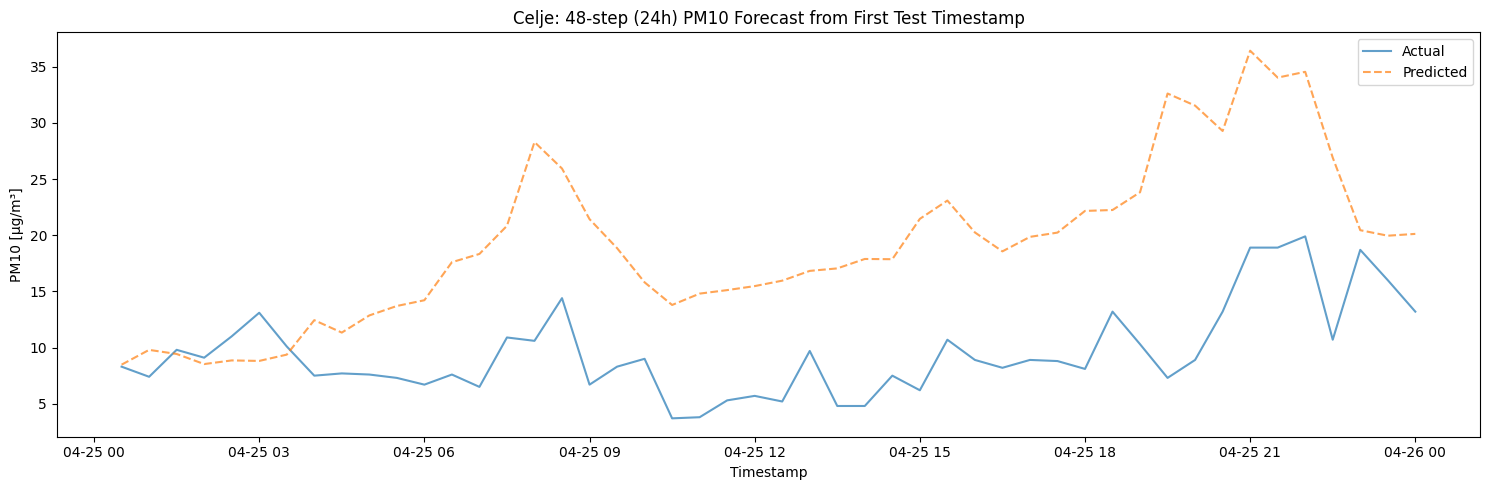

In [357]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor

# --- Train model ---
model = MultiOutputRegressor(RandomForestRegressor(n_estimators=200, random_state=42))
model.fit(X_train, y_train)

# --- Predict for test set ---
y_pred = model.predict(X_test)  # shape = (n_test_samples, 48)

# --- Plot: first prediction horizon ---
# Take first test sample
first_pred = y_pred[0]
first_actual = y_test[0]

# Generate timestamps for 48 steps ahead (30-min intervals)
start_time = test["datum_zajema"].iloc[0]
timestamps = pd.date_range(start=start_time + pd.Timedelta(minutes=30),
                           periods=48, freq="30min")

plt.figure(figsize=(15,5))
plt.plot(timestamps, first_actual, label="Actual", alpha=0.7)
plt.plot(timestamps, first_pred, label="Predicted", linestyle="--", alpha=0.7)
plt.xlabel("Timestamp")
plt.ylabel("PM10 [µg/m³]")
plt.title("Celje: 48-step (24h) PM10 Forecast from First Test Timestamp")
plt.legend()
plt.tight_layout()
plt.show()
